# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

[Google Collab link](https://colab.research.google.com/drive/1Q0Ap19bKN2rXLfYKMo_Tpd6Ykm5Obb8w?usp=sharing)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
DELAY_MIN = 100
DELAY_MAX = 400
import random

def make_delay():
    sleep(random.randint(DELAY_MIN, DELAY_MAX) / 1000)

def make_request(url, params):
    data = requests.get(url, params).json()
    make_delay()
    return data

In [ ]:
specializations = ["Грузчик", "Дворник", "Кассир", "Senior c++", "data analyst"]

specializations_dct = {}
specializations_dct.update([(spec, []) for spec in specializations])

URL = 'https://api.hh.ru/vacancies'
for spec in specializations_dct.keys():
    params = {
        'text': spec,
        'area': 1,
        'page': 0,
        'per_page': 100,
    }
    data = make_request(URL, params)
    pages = data['pages']
    for i in range(pages):
        params = {
            'text': spec,
            'area': 1,
            'page': i,
            'per_page': 100,
        }
        data = make_request(URL, params)
        specializations_dct[spec].extend(data['items'])
        if i % 5 == 0:
            print("{} - {}/{}".format(spec, i, pages))
    print()

Грузчик - 0/20
Грузчик - 5/20
Грузчик - 10/20
Грузчик - 15/20

Дворник - 0/18
Дворник - 5/18
Дворник - 10/18
Дворник - 15/18

Кассир - 0/20
Кассир - 5/20
Кассир - 10/20
Кассир - 15/20

Senior c++ - 0/6
Senior c++ - 5/6

data analyst - 0/14
data analyst - 5/14
data analyst - 10/14



(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
for spec, lst in specializations_dct.items():
    print("{} - {}".format(spec, len(lst)))

Грузчик - 2000
Дворник - 1784
Кассир - 2000
Senior c++ - 596
data analyst - 1306


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
print(specializations_dct['Грузчик'][0])

{'id': '76557054', 'premium': False, 'name': 'Водитель автомобиля', 'department': None, 'has_test': False, 'response_letter_required': False, 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'}, 'salary': {'from': 80000, 'to': 100000, 'currency': 'RUR', 'gross': False}, 'type': {'id': 'open', 'name': 'Открытая'}, 'address': {'city': 'Москва', 'street': 'Дубининская улица', 'building': '27с4', 'lat': 55.725757, 'lng': 37.637587, 'description': None, 'raw': 'Москва, Дубининская улица, 27с4', 'metro': None, 'metro_stations': [], 'id': '12835364'}, 'response_url': None, 'sort_point_distance': None, 'published_at': '2023-05-10T14:08:31+0300', 'created_at': '2023-05-10T14:08:31+0300', 'archived': False, 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=76557054', 'insider_interview': None, 'url': 'https://api.hh.ru/vacancies/76557054?host=hh.ru', 'adv_response_url': None, 'alternate_url': 'https://hh.ru/vacancy/76557054', 'relations': [], 'emplo

In [ ]:
from dataclasses import dataclass

@dataclass
class Company:
    vacancy: str
    name: str
    lat: float
    lng: float

    def has_coords(self) -> bool:
        return self.lat and self.lng

    def __str__(self) -> str:
        return '{} {} - ({}, {})'.format(self.vacancy, self.name, self.lat, self.lng)
    
    def __repr__(self) -> str:
        return self.__str__()

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = []
for spec, lst in specializations_dct.items():
    for vacancy in lst:

        employer = vacancy.get('employer', None)
        employer_name = None
        if employer:
            employer_name = employer.get('name', None)

        address = vacancy.get('address', None)
        lat, lng = None, None
        if address:
            lat = address.get('lat', None)
            lng = address.get('lng', None)
        companies.append(Company(spec, employer_name, lat, lng))
print(companies)

[Грузчик АРОСА - (55.725757, 37.637587), Грузчик Научно-производственное предприятие Торий - (55.648931, 37.558993), Грузчик PIZZASUSHIWOK - (None, None), Грузчик ГЛ - (None, None), Грузчик Зимние Игры - (55.81997, 37.872335), Грузчик Ромфарм Компани - (None, None), Грузчик Аква Престиж - (None, None), Грузчик ТАЙМЫР ИНВЕСТ - (55.654142, 37.555885), Грузчик ТД ГраСС - (55.660683, 37.707754), Грузчик RDWI - (None, None), Грузчик Комплектэнерго - (None, None), Грузчик Гастрономическая Академия Рожниковского - (55.858887, 37.693992), Грузчик А3 Групп - (55.755864, 37.617698), Грузчик Elektromobili - (None, None), Грузчик Faberlic - (55.585337, 37.621471), Грузчик Mountain Ridge - (55.78001769315327, 37.63351019393176), Грузчик Мебельный Магазин - (None, None), Грузчик МКТ - (55.664857, 37.631936), Грузчик Пиво Твоей Мечты - (55.596696, 37.589814), Грузчик КВАНТУМ+ - (55.61385, 37.584649), Грузчик Котоврасова Елена Геннадьевна - (None, None), Грузчик Сахалин рыба (г. Москва) - (None, None)

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
companies_with_coords = []
for company in companies:
        if company.has_coords():
            companies_with_coords.append(company)
len(companies_with_coords)

5294

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
import math

MOSCOW_LAT = 55.7522
MOSCOW_LNG = 37.6156
RADIUS = 18
def dst_km(lat1, lng1, lat2, lng2):
    R = 6371
    dlng = math.radians(lng2 - lng1)
    dlat = math.radians(lat2 - lat1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlng / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

def is_in_Moscow(lat, lng) -> bool:
    return dst_km(MOSCOW_LAT, MOSCOW_LNG, lat, lng) < RADIUS

In [ ]:
companies_mrr = []
for company in companies_with_coords:
    if is_in_Moscow(company.lat, company.lng):
        companies_mrr.append(company)
len(companies_mrr)

4624

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

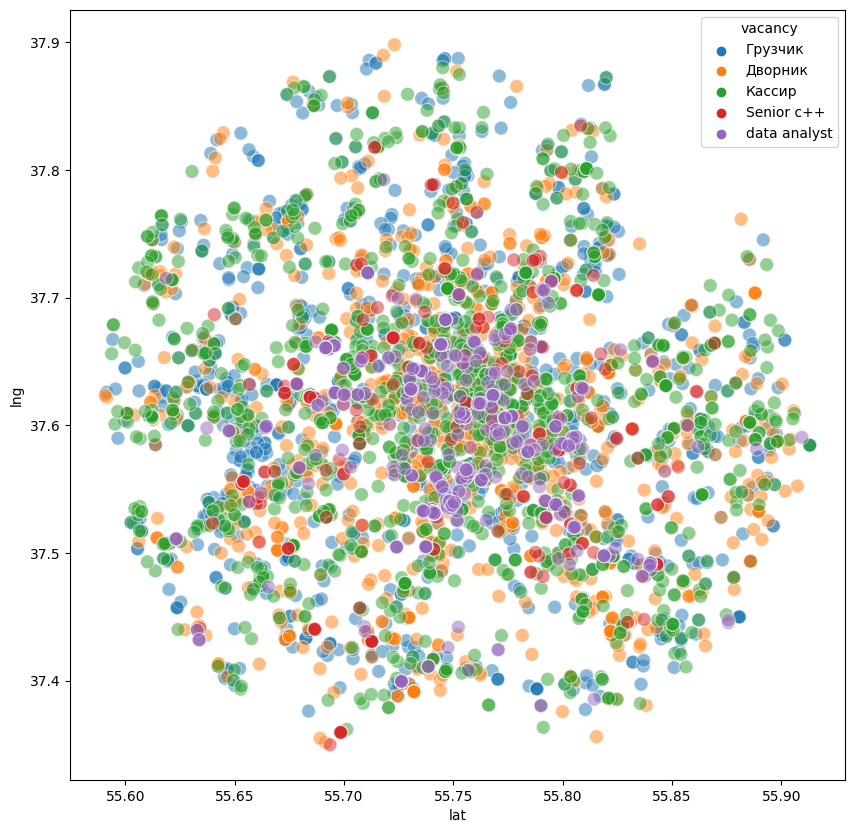

In [ ]:
df = pd.DataFrame(companies_mrr, columns=['name', 'lat', 'lng', 'vacancy'])
plt.figure(figsize=(10, 10))
sns.scatterplot(x='lat', y='lng', hue='vacancy', data=df, alpha=.5, s=100)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="lat", lon="lng", hover_name="name", hover_data=["vacancy"], color="vacancy", zoom=10, height=600)

fig.update_traces(marker={'size': 10, 'opacity': 0.5})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

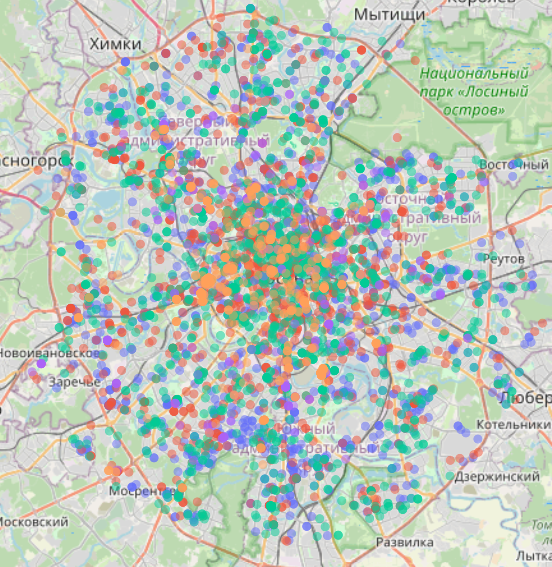

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Предложений работы, для которой не нужны специальные навыки, заметно больше, чем работы в сфере IT (что вроде как нормально). Айтишники нужны преимущественно в центре, когда как работа без специальных навыков распространена везде (пятерочки-то везде нужны). В центре Москвы, очевидно, платят больше

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 91.0MB/s]


Создадим DataFrame:

In [ ]:
diamonds = pd.read_csv("diamonds.csv", index_col=0)

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


In [ ]:
diamonds['carat_weight'].sum() * 200 / 1000

33182.896

(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
print('{} - {}'.format(diamonds['total_sales_price'].argmax(),
                       diamonds['total_sales_price'].max()))
print('{} - {}'.format(diamonds['total_sales_price'].argmin(),
                       diamonds['total_sales_price'].min()))

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
diamonds[(diamonds == 'unknown') | diamonds.isna()].count().sum()

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
diamonds.columns[diamonds[(diamonds == 'unknown') | (diamonds.isna())].count() != 0].tolist()

['color',
 'cut_quality',
 'eye_clean',
 'culet_size',
 'culet_condition',
 'girdle_min',
 'girdle_max',
 'fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
non_inf_cols = diamonds.columns[diamonds.columns.str.startswith('fancy_color_') | diamonds.columns.str.startswith('fluor_')]

len(non_inf_cols)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
diamonds[non_inf_cols][(diamonds[non_inf_cols] != 'unknown') & (diamonds[non_inf_cols].notna())].count()

fluor_color                     15726
fluor_intensity                219575
fancy_color_dominant_color       9164
fancy_color_secondary_color      1062
fancy_color_overtone             2038
fancy_color_intensity            9162
dtype: int64

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(non_inf_cols, axis=1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
non_inf_cols = diamonds.columns[diamonds.columns.str.startswith('culet_')]
diamonds[non_inf_cols][(diamonds[non_inf_cols] != 'unknown') & (diamonds[non_inf_cols].notna())].count()
diamonds.drop(non_inf_cols, axis=1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds['total_sales_price'].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds[::2]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds[::6]

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
diamonds.select_dtypes(include='object')

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219699,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219700,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219701,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219702,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
col = diamonds['total_sales_price'][:100]
col.values.reshape(1, -1) * col.values.reshape(-1, 1)

array([[40000, 40000, 40000, ..., 53200, 53200, 53600],
       [40000, 40000, 40000, ..., 53200, 53200, 53600],
       [40000, 40000, 40000, ..., 53200, 53200, 53600],
       ...,
       [53200, 53200, 53200, ..., 70756, 70756, 71288],
       [53200, 53200, 53200, ..., 70756, 70756, 71288],
       [53600, 53600, 53600, ..., 71288, 71288, 71824]])

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

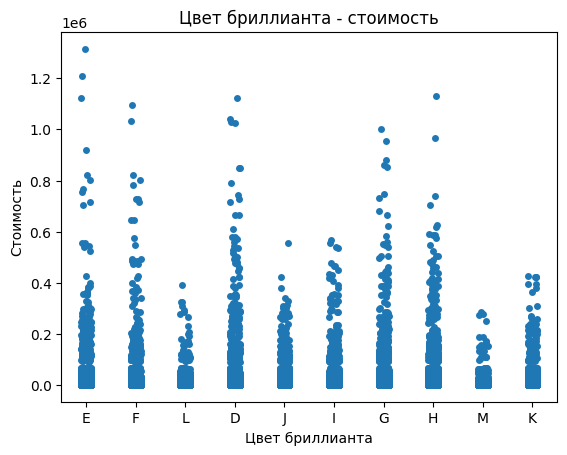

In [ ]:
g = sns.stripplot(x='color', y='total_sales_price', data=diamonds[(diamonds['color'] != 'unknown') ])
g.set_xlabel('Цвет бриллианта')
g.set_ylabel('Стоимость')
g.set_title('Цвет бриллианта - стоимость');

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

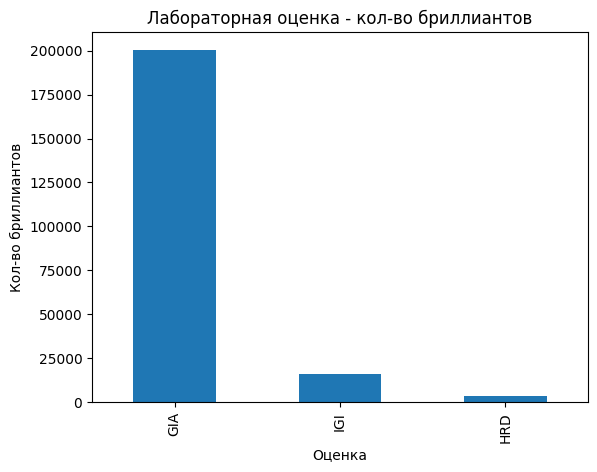

In [ ]:
g = diamonds['lab'].value_counts().plot(kind='bar')
g.set_title('Лабораторная оценка - кол-во бриллиантов')
g.set_xlabel('Оценка')
g.set_ylabel('Кол-во бриллиантов');

(2 балла) Постройте график `вес бриллианта - стоимость`:

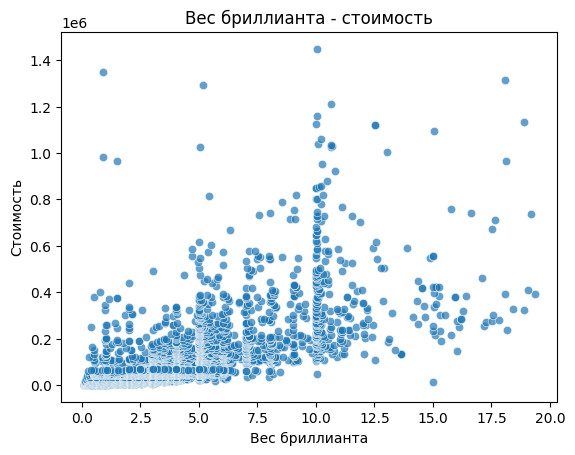

In [ ]:
g = sns.scatterplot(x='carat_weight', y='total_sales_price', data=diamonds, alpha=0.7)
g.set_xlabel('Вес бриллианта')
g.set_ylabel('Стоимость')
g.set_title('Вес бриллианта - стоимость');

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

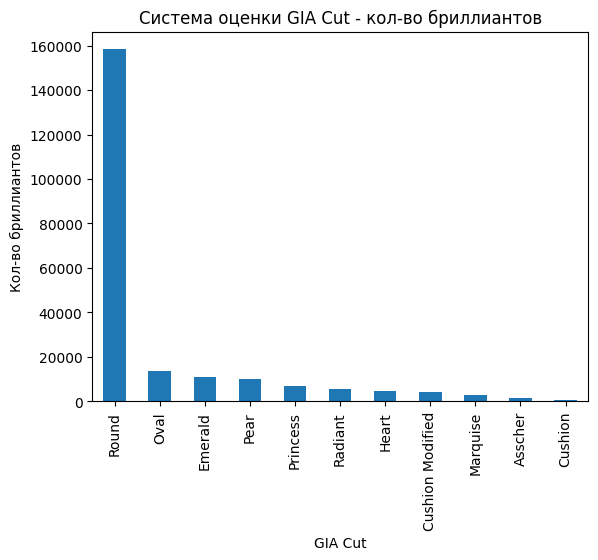

In [ ]:
g = diamonds['cut'].value_counts().plot(kind='bar')
g.set_title('Система оценки GIA Cut - кол-во бриллиантов')
g.set_xlabel('GIA Cut')
g.set_ylabel('Кол-во бриллиантов');

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

По цвету бриллианты, в целом, распределены довольно равномерно (по крайней мере, нельзя выделить однозначно доминирующий или однозначно дефицитный цвет), в то время как по огранке и лабораторной оценке есть "лидер". Зависимость стоимости от веса вполне очевидная: больше вес - больше цена. Однако, стоимость все равно довольно сильно варьируется от других параметров

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [ ]:
df = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
df.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(drop=True, inplace=True)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
df['mink_sum'] = (df['meas_length'] ** 3 + df['meas_width'] ** 3 + df['meas_depth'] ** 3) ** (1 / 3)

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [ ]:
df = df[['mink_sum', 'total_sales_price']]
df

,mink_sum,total_sales_price
0,0.000000,372
1,5.326833,890
2,5.581368,558
3,6.109887,1584
4,9.751255,2402
...,...,...
219698,7.203987,7161
219699,6.638115,2448
219700,5.584935,804
219701,9.173922,8432


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
border = int(len(df) / 10 * 8)
train_data = df[:border]
test_data = df[border:]

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

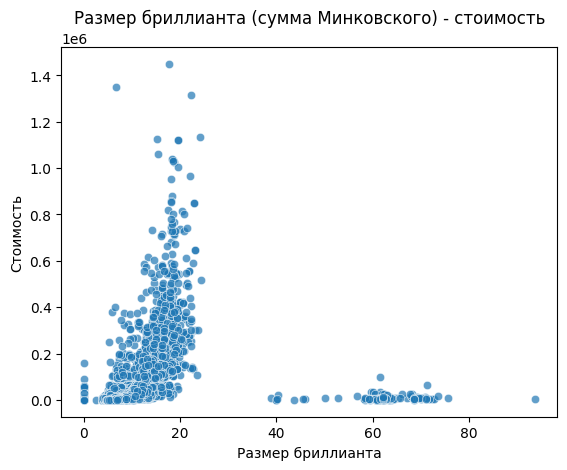

In [ ]:
g = sns.scatterplot(x='mink_sum', y='total_sales_price', data=train_data, alpha=0.7)
g.set_xlabel('Размер бриллианта')
g.set_ylabel('Стоимость')
g.set_title('Размер бриллианта (сумма Минковского) - стоимость');

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

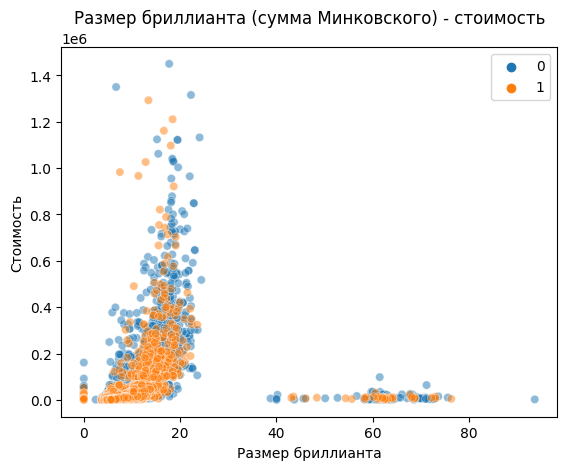

In [ ]:
g = sns.scatterplot(x='mink_sum', y='total_sales_price', data=df, hue=(df.index >= border).astype(int), alpha=0.5)
g.set_xlabel('Размер бриллианта')
g.set_ylabel('Стоимость')
g.set_title('Размер бриллианта (сумма Минковского) - стоимость');

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(train_data)
distances, indices = nbrs.kneighbors(test_data)

In [ ]:
neighbors = train_data.iloc[indices.reshape(len(indices))].reset_index(drop=True)
neighbors.rename(columns={'mink_sum': 'neighbor_mink_sum', 'total_sales_price': 'neighbor_total_sales_price'}, inplace=True)
test_data_idx = test_data.reset_index(drop=True)
neighbors_data = test_data_idx.merge(neighbors, left_index=True, right_index=True)
neighbors_data = neighbors_data.merge(pd.DataFrame(distances, columns=['distance']), left_index=True, right_index=True)
neighbors_data

,mink_sum,total_sales_price,neighbor_mink_sum,neighbor_total_sales_price,distance
0,7.843848,6267,7.739068,6267,0.104780
1,6.640797,1456,6.639223,1456,0.001574
2,6.607842,3076,6.608029,3076,0.000188
3,5.841111,1158,5.841111,1158,0.000000
4,6.687147,994,6.701564,994,0.014417
...,...,...,...,...,...
43936,7.203987,7161,7.539114,7161,0.335127
43937,6.638115,2448,6.633764,2448,0.004351
43938,5.584935,804,5.584935,804,0.000000
43939,9.173922,8432,8.670044,8432,0.503878


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
neighbors_data['cost_diff_percent'] = (1 - neighbors_data['total_sales_price'] / neighbors_data['neighbor_total_sales_price']).abs() * 100
neighbors_data

,mink_sum,total_sales_price,neighbor_mink_sum,neighbor_total_sales_price,distance,cost_diff_percent
0,7.843848,6267,7.739068,6267,0.104780,0.0
1,6.640797,1456,6.639223,1456,0.001574,0.0
2,6.607842,3076,6.608029,3076,0.000188,0.0
3,5.841111,1158,5.841111,1158,0.000000,0.0
4,6.687147,994,6.701564,994,0.014417,0.0
...,...,...,...,...,...,...
43936,7.203987,7161,7.539114,7161,0.335127,0.0
43937,6.638115,2448,6.633764,2448,0.004351,0.0
43938,5.584935,804,5.584935,804,0.000000,0.0
43939,9.173922,8432,8.670044,8432,0.503878,0.0


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
cleared_diamonds = diamonds[diamonds['total_sales_price'].notna()]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def encode(features):
  features_data = cleared_diamonds[features]
  enc = OneHotEncoder()
  enc.fit(features_data)
  features_data = enc.transform(features_data)
  features_name = enc.get_feature_names_out(features)
  features_data = pd.DataFrame(features_data.toarray(), columns=features_name)
  features_data['total_sales_price'] = cleared_diamonds['total_sales_price']
  features_data = features_data[features_data['total_sales_price'].notna()]
  return features_data, features_name

encode(['cut', 'color'])[0]

,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,...,color_F,color_G,color_H,color_I,color_J,color_K,color_L,color_M,color_unknown,total_sales_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161102.0
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1210692.0
219700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1292500.0
219701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1315496.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
from sklearn.model_selection import train_test_split

def get_dataset(features):
    encoded, features = encode(features)
    return train_test_split(encoded[features], encoded['total_sales_price'], test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = get_dataset(['cut', 'color'])

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def get_model(X_train, y_train):
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model

model = get_model(X_train, y_train)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
from sklearn.metrics import mean_squared_error

def get_error(features):
    X_train, X_test, y_train, y_test = get_dataset(features)
    model = get_model(X_train, y_train)
    return mean_squared_error(y_test, model.predict(X_test))

get_error(['cut', 'color'])

699257855.8465106

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

In [ ]:
from itertools import combinations
from tqdm.notebook import tqdm

cat_cols = cleared_diamonds.select_dtypes(include='object').columns
comb = list(combinations(cat_cols, 2))
results = pd.Series(index=comb, dtype=np.float64)

for features in tqdm(comb, total=len(comb)):
    results[features] = get_error(list(features))

results.sort_values()

  0%|          | 0/45 [00:00<?, ?it/s]

(cut, symmetry)              6.981735e+08
(cut, color)                 6.992579e+08
(cut, girdle_max)            7.004294e+08
(cut, lab)                   7.007085e+08
(cut, girdle_min)            7.010416e+08
(cut, clarity)               7.015158e+08
(cut, eye_clean)             7.015446e+08
(cut_quality, symmetry)      7.019061e+08
(cut, polish)                7.020896e+08
(cut, cut_quality)           7.024390e+08
(color, cut_quality)         7.028773e+08
(cut_quality, lab)           7.038299e+08
(cut_quality, girdle_max)    7.040772e+08
(cut_quality, girdle_min)    7.042188e+08
(color, lab)                 7.046138e+08
(clarity, cut_quality)       7.046690e+08
(cut_quality, eye_clean)     7.049536e+08
(color, girdle_min)          7.051341e+08
(cut_quality, polish)        7.056058e+08
(color, clarity)             7.059751e+08
(color, eye_clean)           7.060815e+08
(eye_clean, girdle_min)      7.063082e+08
(eye_clean, girdle_max)      7.066923e+08
(color, girdle_max)          7.072

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

При любой выборке пары признаков получается довольно большая ошибка (причем примерно одинаковая), из чего можно сделать вывод, что категориальные признаки в данном наборе данных неинформативны.\
Готовые инструменты - огонь, делают все за меня, мне лишь оставалось написать пару функций